# Кусок Лемматиазации

In [1]:
import spacy

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Define a set of common English prepositions
prepositions = {"in", "on", "at", "to", "for", "with", "about", "against", "between", "during", "before", "after", "above", "below"}

def to_infinitive_without_prepositions(text):
    doc = nlp(text)
    infinitives = []
    
    for token in doc:
        # Add the lemma (infinitive form) of the verb if it's a verb
        if token.pos_ == 'VERB':
            infinitives.append(token.lemma_)
        # Skip prepositions
        elif token.text.lower() not in prepositions:
            infinitives.append(token.text)
    
    return ' '.join(infinitives)

text = "I am reading in the library and running to the park."
result = to_infinitive_without_prepositions(text)
print(result)  # Example output

I am read the library and run the park .


# Определение TfidfVectorizerов под каждый существенный признак

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Чтение CSV файла
file_path = r'D:\BAZA PC\Documents\training_data.csv'  # Убедитесь, что путь указан правильно
file_path2 = r'D:\BAZA PC\Documents\jinr_journals.csv' 
df = pd.read_csv(file_path)
df2 = pd.read_csv(file_path2)

# Векторизация текстов из столбца 'title'
texts_title = df["title"].tolist()
vectorizer_title = TfidfVectorizer()
X_title = vectorizer_title.fit_transform(texts_title)

texts_summary = df["summary"].tolist()
vectorizer_summary = TfidfVectorizer()
X_summary = vectorizer_summary.fit_transform(texts_summary)

texts_journal = df2["Journal"].tolist()
vectorizer_journal = TfidfVectorizer()
X_journal = vectorizer_journal.fit_transform(texts_journal)

texts_publications = df2["Publications"].tolist()
vectorizer_publications = TfidfVectorizer()
X_publications = vectorizer_publications.fit_transform(texts_publications)

data10 = {
    "Keyword": [
        "High Energy Physics",
        "Particle Physics",
        "Quantum Field Theory",
        "Standard Model",
        "Higgs Boson",
        "Collider Physics",
        "Cosmic Rays",
        "Neutrino Physics",
        "Dark Matter",
        "String Theory",
        "Supersymmetry",
        "Quantum Gravity",
        "LHC (Large Hadron Collider)",
        "CP Violation",
        "Astroparticle Physics"
    ],
    "Link": [
        "https://arxiv.org/list/hep-th/recent",
        "https://www.sciencedirect.com/journal/physics-reports",
        "https://www.aps.org/units/dpf/",
        "https://www.cern.ch/",
        "https://www.sciencedaily.com/terms/higgs_boson.htm",
        "https://www.iopscience.iop.org/journal/0954-3899",
        "https://www.nasa.gov/mission_pages/GLAST/main/index.html",
        "https://www.ippp.dur.ac.uk/",
        "https://www.space.com/dark-matter",
        "https://www.springer.com/gp/book/9783642223065",
        "https://www.nature.com/articles/nphys1172",
        "https://www.springer.com/gp/book/9783319192063",
        "https://home.cern/news/news/physics/what-happened-higgs-boson",
        "https://www.osti.gov/biblio/1295474",
        "https://www.aps.org/publications/journals/physrev/index.cfm"
    ]
}






df_keywords = pd.DataFrame(data10)

texts_keyword = df_keywords["Keyword"].tolist()
vectorizer_keyword = TfidfVectorizer()
X_keyword = vectorizer_keyword.fit_transform(texts_keyword)

texts_link = df_keywords["Link"].tolist()
vectorizer_link = TfidfVectorizer()
X_link = vectorizer_link.fit_transform(texts_link)

def evaluate_text_summary(new_text):
    new_vector = vectorizer_summary.transform([new_text])
    similarities = cosine_similarity(new_vector, X_summary)
    max_similarity = similarities.max()
    return max_similarity

def evaluate_text_keyword(new_text):
    new_vector = vectorizer_keyword.transform([new_text])
    similarities = cosine_similarity(new_vector, X_keyword)
    max_similarity = similarities.max()
    return max_similarity

def evaluate_text_link(new_text):
    new_vector = vectorizer_link.transform([new_text])
    similarities = cosine_similarity(new_vector, X_link)
    max_similarity = similarities.max()
    return max_similarity

def evaluate_text_journal(new_text):
    new_vector = vectorizer_journal.transform([new_text])
    similarities = cosine_similarity(new_vector, X_journal)
    max_similarity = similarities.max()
    return max_similarity

def evaluate_text_publications(new_text):
    new_vector = vectorizer_publications.transform([new_text])
    similarities = cosine_similarity(new_vector, X_publications)
    max_similarity = similarities.max()
    return max_similarity

def evaluate_text_title(new_text):
    new_vector = vectorizer_title.transform([new_text])
    similarities = cosine_similarity(new_vector, X_title)
    max_similarity = similarities.max()
    return max_similarity

# Пример нового текста
new_text = "physics"
similarity_score = evaluate_text_title(new_text)

print(f"Сходство с обучающими текстами: {similarity_score:.2f}")


Сходство с обучающими текстами: 0.35


In [3]:
import pandas as pd
import os

a1 = 4
a2 = 4 
a3 = 3
a4 = 2
a5 = 5 #link
a6 = 8 #keyword

final_results = pd.DataFrame()
# Путь к папке с файлами
directory_path = 'D:\\BAZA PC\\Documents\\all_china\\all_china\\2024'

# Обработка каждого файла в директории
for filename in os.listdir(directory_path):
    print(filename)
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)
        
        # Чтение CSV файла
        df = pd.read_csv(file_path)
        df = df.astype(str)
        # Инициализация новых колонок
        df['title_prob'] = 0
        df['abstract_prob'] = 0
        df['journal_prob'] = 0
        df['publisher_prob'] = 0
        df['keyword_prob'] = 0
        df['link_prob'] = 0
        df['Abbreviation_prob'] = 0
        df['counter'] = 0

        # Применение функций к каждому значению в столбце 'Название документа'
        for index, row in df.iterrows():
            # Для заголовка
            processed_title = to_infinitive_without_prepositions(row['Title'])
            df.at[index, 'title_prob'] = evaluate_text_title(processed_title)
           
            # Для краткого описания
            processed_abstract = to_infinitive_without_prepositions(row['Abstract'])
            df.at[index, 'abstract_prob'] = evaluate_text_summary(processed_abstract)
           
            # Для названия источника
            processed_journal = to_infinitive_without_prepositions(row['Source title'])
            df.at[index, 'journal_prob'] = evaluate_text_journal(processed_journal)
           
            # Для издателя
            processed_publisher = to_infinitive_without_prepositions(row['Publisher'])
            df.at[index, 'publisher_prob'] = evaluate_text_publications(processed_publisher)
           
            
            processed_publisher = to_infinitive_without_prepositions(row['Link'])
            df.at[index, 'link_prob'] = evaluate_text_link(processed_publisher)
           
           
            
            processed_publisher = to_infinitive_without_prepositions(row['Author Keywords'])
            df.at[index, 'keyword_prob'] = evaluate_text_keyword(processed_publisher)
            
            
            df.at[index, 'counter'] = (
                df.at[index, 'title_prob'] * a1 +
                df.at[index, 'abstract_prob'] * a2 +
                df.at[index, 'journal_prob'] * a3 +
                df.at[index, 'publisher_prob'] * a4 +
                df.at[index, 'link_prob'] * a5 +
                df.at[index, 'keyword_prob'] * a6
            )
            
            
        top_5 = df.nlargest(5, 'counter')
        final_results = pd.concat([final_results, top_5], ignore_index=True)
        print(f"Обработанный файл: {filename}")
        

# Сообщение о завершении обработки
print("Обработка завершена.")
final_results

china_2024_apr_(1, 8).csv
Обработанный файл: china_2024_apr_(1, 8).csv
china_2024_apr_(17, 24).csv
Обработанный файл: china_2024_apr_(17, 24).csv
china_2024_apr_(24, 31).csv
Обработанный файл: china_2024_apr_(24, 31).csv
china_2024_apr_(9, 16).csv
Обработанный файл: china_2024_apr_(9, 16).csv
china_2024_aug_(1, 8).csv
Обработанный файл: china_2024_aug_(1, 8).csv
china_2024_aug_(17, 24).csv
Обработанный файл: china_2024_aug_(17, 24).csv
china_2024_aug_(24, 31).csv
Обработанный файл: china_2024_aug_(24, 31).csv
china_2024_aug_(9, 16).csv
Обработанный файл: china_2024_aug_(9, 16).csv
china_2024_dec_(1, 8).csv
Обработанный файл: china_2024_dec_(1, 8).csv
china_2024_dec_(17, 24).csv
Обработанный файл: china_2024_dec_(17, 24).csv
china_2024_dec_(24, 31).csv
Обработанный файл: china_2024_dec_(24, 31).csv
china_2024_dec_(9, 16).csv
Обработанный файл: china_2024_dec_(9, 16).csv
china_2024_feb_(1, 8).csv
Обработанный файл: china_2024_feb_(1, 8).csv
china_2024_feb_(17, 24).csv
Обработанный файл: 

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,Source,EID,title_prob,abstract_prob,journal_prob,publisher_prob,keyword_prob,link_prob,Abbreviation_prob,counter
0,Lin C.H.E.N.; Xun-xiu Z.H.O.U.; Axikegu; Dai-h...,"Lin, C.H.E.N. (59164466400); Xun-xiu, Z.H.O.U....",59164466400; 56122415900; 57217532543; 5721718...,Effects of Thunderstorm Electric Field on the ...,2024,Chinese Astronomy and Astrophysics,48,2,nan,263,...,Scopus,2-s2.0-85195473631,0.411349,0.363870,0.501777,1.0,1.000000,0.406202,0,16.637218
1,Fu L.; Chen X.; Chen Y.; Jiang S.; Shen B.,"Fu, Lin (56577009300); Chen, Xiaoyuan (5573916...",56577009300; 55739163400; 59075095500; 5721175...,Hydrogen-electricity hybrid energy pipelines f...,2024,International Journal of Hydrogen Energy,61,nan,nan,251,...,Scopus,2-s2.0-85186631171,0.379665,0.336428,0.776432,1.0,0.910265,0.406202,0,16.506797
2,Bose B.; Garg A.; Gao L.; Wei L.; Moulik B.,"Bose, Bibaswan (57205283682); Garg, Akhil (554...",57205283682; 55482431700; 58529903800; 5834308...,Anode health-conscious tri-zoned equivalent ci...,2024,Journal of Energy Storage,83,nan,110742,nan,...,Scopus,2-s2.0-85185198685,0.634404,0.335279,0.776432,1.0,0.707107,0.406202,0,15.895891
3,Wang F.; Wang H.; Shi X.; Diao C.; Li C.; Li W...,"Wang, Feng (57463731300); Wang, Hao (589142225...",57463731300; 58914222500; 57194379108; 4866093...,Polyimide composites crosslinked by aromatic m...,2024,Chemical Engineering Journal,485,nan,149972,nan,...,Scopus,2-s2.0-85186413446,0.388887,0.311368,0.580702,1.0,0.910265,0.406202,0,15.856257
4,Yang C.; Guo R.; Wu Y.; Zhang Y.; Yuan J.,"Yang, Chao (56914597600); Guo, Ran (5726747110...",56914597600; 57267471100; 57447391700; 5589998...,Molecular dynamics modeling and experimental s...,2024,International Journal of Hydrogen Energy,61,nan,nan,949,...,Scopus,2-s2.0-85186953565,0.337426,0.354464,0.776432,1.0,0.841031,0.406202,0,15.856112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Wang L.; Li L.; Sun L.; Qian Y.; Zhan X.,"Wang, Leilei (56304451300); Li, Linqin (589659...",56304451300; 58965942000; 57904637300; 5638806...,AlNbTiVZr refractory high entropy alloy combin...,2024,Journal of Alloys and Compounds,999,nan,174878,nan,...,Scopus,2-s2.0-85194962967,0.419153,0.383505,0.635571,1.0,0.910265,0.406202,0,16.430474
196,Zhang N.; Zhou H.; Wang T.; Ma X.; Lin N.; Fu ...,"Zhang, Na (57210174230); Zhou, Huili (57217382...",57210174230; 57217382929; 56135311500; 5722172...,High-sensitivity ratiometric thermometers of Y...,2024,Journal of Alloys and Compounds,999,nan,174902,nan,...,Scopus,2-s2.0-85194867232,0.398469,0.300072,0.635571,1.0,0.910265,0.406202,0,16.014006
197,Tang J.; Li Q.; Werle S.; Wang S.; Yu H.,"Tang, Junrong (57210830367); Li, Qibin (558214...",57210830367; 55821458600; 35202755800; 5719334...,Development and comprehensive thermo-economic ...,2024,Energy,303,nan,131941,nan,...,Scopus,2-s2.0-85195405885,0.487659,0.319194,0.591095,1.0,0.863553,0.406202,0,15.940136
198,Song X.; Gong H.; Li H.; Zhang M.; Jiang L.; W...,"Song, Xiaokong (59205069500); Gong, Hao (58825...",59205069500; 58825778100; 58140625100; 5869774...,Improved abrasion-resistant coatings using des...,2024,Solar Energy Materials and Solar Cells,275,nan,113003,nan,...,Scopus,2-s2.0-85197659895,0.573413,0.258817,0.450358,1.0,0.841031,0.406202,0,15.439251


In [48]:
final_result_2024 = final_results.to_csv('answer.csv', index=False)
final_result_2022 = pd.read_csv('D:\\BAZA PC\\Documents\\answer4.csv')

In [7]:
with open('answer.txt', 'w', encoding='utf-8') as file:
    file.write(final_results.to_string(index=False))


# Карта тепла (Heatmap) корреляций между вероятностями и counter

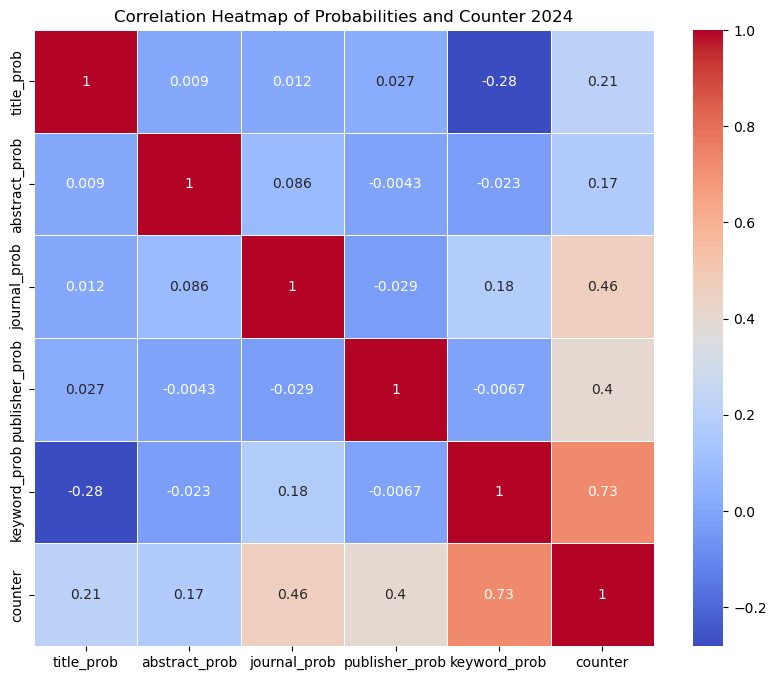

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numeric columns for the heatmap
heatmap_data = final_results[['title_prob', 'abstract_prob', 'journal_prob', 'publisher_prob', 'keyword_prob', 'counter']]

# Generating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Probabilities and Counter 2024')
plt.show()

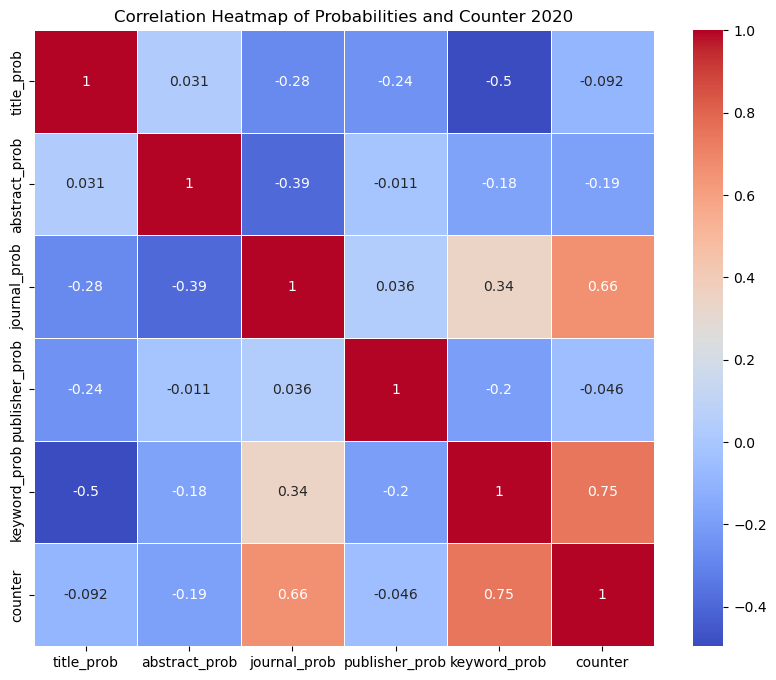

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numeric columns for the heatmap
heatmap_data = final_result_2022[['title_prob', 'abstract_prob', 'journal_prob', 'publisher_prob', 'keyword_prob', 'counter']]

# Generating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Probabilities and Counter 2020')
plt.show()

# Статистика по годам 

Сортируем значения по количеству цитировний автора, по counter, а потом с наименьшим keyword, так как у него слишком высокая корреляция с ответом получилась из-за немного неадекватно подобранного веса, а хочется в первую очередь видеть варианты с равноценным вкладом всех признаков

In [43]:
# Преобразуем колонку 'Cited by' в числовой тип данных, если она не в числовом формате
final_results['Cited by'] = pd.to_numeric(final_results['Cited by'], errors='coerce')

# Выполним сортировку по 'Cited by' по убыванию
final_results_sorted = final_results.sort_values(by='Cited by', ascending=False)
final_results_sorted = final_results.sort_values(by='counter', ascending=False)
final_results_sorted = final_results.sort_values(by='keyword_prob', ascending=True)

# Выведем первые строки отсортированного результата для проверки
final_results_sorted[['Title', 'Authors', 'Affiliations', 'Year']]


,Title,Authors,Affiliations,Year
57,Construction of macromolecular structure model...,Zhu M.; Liu Z.; Yang H.; Dong B.; Yao M.,College of Safety and Environmental Engineerin...,2024
59,Increasing stability for inverse source proble...,Ben Aïcha I.; Hu G.H.; Si S.L.,Higher Institute for Preparatory Studies in Bi...,2024
169,Contact angle hysteresis due to electric inhom...,Wang W.; Xu S.; Wang Y.; Chen X.,"School of Physical Science and Technology, Nor...",2024
43,Path planning of PRM based on artificial poten...,Zheng X.; Cao J.; Zhang B.; Zhang Y.; Chen W.;...,"School of Nuclear Science and Technology, Univ...",2024
171,Leaching of palladium from spent Pd/Al2O3 cata...,Zhang H.; Ou X.; Sun Y.; Xiang Y.; Yang S.; Ch...,State Key Laboratory of Gansu Advanced Non-fer...,2024
...,...,...,...,...
82,Compression performance evaluation of a novel ...,Liu B.; Zou J.; Yin H.; Gu X.; Yang Y.; Chen X.,School of Mechanical and Electronic Engineerin...,2024
116,Solid-state synthesis of low-cost and high-ene...,Jian Z.-C.; Liu Y.-F.; Zhu Y.-F.; Li J.-Y.; Hu...,"Institute for Carbon Neutralization, College o...",2024
124,Scale invariant extension of the Standard Mode...,Aoki M.; Kubo J.; Yang J.,"Institute for Theoretical Physics, Kanazawa Un...",2024
113,Analysis and application of occupationally exp...,Zhang Y.; Fan S.; Zhao Y.; Li M.; Deng J.; Sun Q.,Key Laboratory of Radiological Protection and ...,2024


In [1]:
# Извлечение столбцов в переменные
authors = final_results_sorted['Authors']
affiliations = final_results_sorted['Affiliations']

# Печать каждой строки с нумерацией
for index, (author, affiliation) in enumerate(zip(authors, affiliations), start=1):
    print(f"{index}. Author: {author}, Affiliations: {affiliation}")


NameError: name 'final_results_sorted' is not defined

# Перед нами то 200 статей за 2024 год, максимально похожих на ОИЯИ по всем признакам

In [7]:
# Преобразуем колонку 'Cited by' в числовой тип данных, если она не в числовом формате
final_result_2022['Cited by'] = pd.to_numeric(final_result_2022['Цитирования'], errors='coerce')

# Выполним сортировку по 'Cited by' по убыванию
final_results_sorted_2022 = final_result_2022.sort_values(by='Цитирования', ascending=False)
final_results_sorted_2022 = final_result_2022.sort_values(by='counter', ascending=False)
final_results_sorted_2022 = final_result_2022.sort_values(by='keyword_prob', ascending=True)

# Выведем первые строки отсортированного результата для проверки
final_results_sorted_2022[['Название документа', 'Автор (ы)', 'Организации', 'Год']]


,Название документа,Автор (ы),Организации,Год
98,Multi-variable grey model based on dynamic bac...,Zeng X.; Yan S.; He F.; Shi Y.,"School of Mathematics and Computing Science, G...",2020
72,Study on the unloading damage constitutive mod...,Yongcheng G.U.O.; Yan S.; Jianlin L.I.; Zuogui...,Key Laboratory of Geological Hazards on Three ...,2020
74,Improved water storage estimates within the No...,Yin W.; Han S.-C.; Zheng W.; Yeo I.-Y.; Hu L.;...,"Qian Xuesen Laboratory of Space Technology, Ch...",2020
64,Water resources management in a reservoir-regu...,Dong N.; Yang M.; Yu Z.; Wei J.; Yang C.; Yang...,State Key Laboratory of Hydrology-Water Resour...,2020
63,Optimal design of groundwater pollution monito...,Fan Y.; Lu W.; Miao T.; An Y.; Li J.; Luo J.,Key Laboratory of Groundwater Resources and En...,2020
...,...,...,...,...
65,"The DAMA project: Achievements, implications a...",Bernabei R.; Belli P.; Bussolotti A.; Cappella...,"Dip. Fisica, Università di Roma “Tor Vergata”,...",2020
66,Cosmic string in Abelian-Higgs model with enha...,Hiramatsu T.; Ibe M.; Suzuki M.,"ICRR, The University of Tokyo, Kashiwa, 277-85...",2020
67,Unattainability of the trans-Planckian regime ...,Briscese F.; Modesto L.,Academy for Advanced Interdisciplinary Studies...,2020
95,A note on the uniform asymptotic behavior of t...,Cang Y.; Yang Y.; Shi X.,"School of Statistics and Mathematics, Nanjing ...",2020


In [45]:
with open('final_results_sorted_2024.csv', 'w', encoding='utf-8') as file:
    file.write(final_results_sorted.to_string(index=False))


In [57]:
# Извлечение столбцов в переменные
authors = final_results_sorted_2022['Автор (ы)']
affiliations = final_results_sorted_2022['Организации']

# Печать каждой строки с нумерацией
for index, (author, affiliation) in enumerate(zip(authors, affiliations), start=1):
    print(f"{index}. Author: {author}, Affiliations: {affiliation}")

1. Author: Zeng X.; Yan S.; He F.; Shi Y., Affiliations: School of Mathematics and Computing Science, Guangxi Colleges and Universities Key Laboratory of Data Analysis and Computation, Guangxi Key Laboratory of Cryptography and Information Security, Guilin University of Electronic Technology, No. 1, Jinji Road, Guilin, 541004, Guangxi, China; School of Mathematics and Statistics, Henan University of Science and Technology, Luoyang, 471023, China; School of Sciences, Southwest Petroleum University, Chengdu, 610500, China
2. Author: Yongcheng G.U.O.; Yan S.; Jianlin L.I.; Zuogui C.; Qinglin X.; Bin Y.A.N., Affiliations: Key Laboratory of Geological Hazards on Three Gorges Reservoir Area, Ministry of Education, China Three Gorges University, Yichang, 443002, China; College of Civil Engineering and Architecture, China Three Gorges University, Yichang, 443002, China; Hubei Key Laboratory of Disaster Prevention and Mitigation, China Three Gorges University, Yichang, 443002, China
3. Author: 

In [5]:
with open('final_results_sorted_2020.csv', 'w', encoding='utf-8') as file:
    file.write(final_results_sorted_2022.to_string(index=False))
